# PROJETO FINAL DE MACHINE LEARNING II

### Objetivos: 
Com o ferramental em análise e em ciência de dados adquirido até o momento, a ideia
é, com este projeto, avaliar um dataset sob três óptica:

1. Uma análise exploratória de dados; 
2. Uma análise de segmentação;
3. Uma análise preditiva.

In [6]:
import kagglehub

# Essa porção do código baixa diretamente a base de dados para o cache do usuário
# Download latest version
path = kagglehub.dataset_download("shivam2503/diamonds")

print("Path to dataset files:", path)

c:\Users\João\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\João\.cache\kagglehub\datasets\shivam2503\diamonds\versions\1


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
df = pd.read_csv(path+'/diamonds.csv')

| **Característica** | **Descrição** |
|---------------------|---------------|
| `x`                | Comprimento (mm) |
| `y`                | Largura (mm)     |
| `z`                | Profundidade (mm) |
| `carat`            | Peso em quilates do diamante |
| `cut`              | Qualidade do corte do diamante. Qualidade em ordem crescente: Fair (Regular), Good (Bom), Very Good (Muito Bom), Premium, Ideal |
| `color`            | Cor do diamante, sendo D a melhor e J a pior |
| `clarity`          | Quão visíveis são as inclusões no diamante (em ordem da melhor para a pior): FL = impecável, IF, I1, I2, I3 (nível 3 de inclusões) |
| `depth`            | Profundidade %: A altura de um diamante, medida da base (culet) até a mesa, dividida pelo diâmetro médio da cintura |
| `table`            | Tabela %: A largura da mesa do diamante expressa como uma porcentagem do seu diâmetro médio |
| `price`            | O preço do diamante |


In [9]:
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
15736,15737,1.01,Ideal,G,VS2,62.0,54.9,6295,6.41,6.44,3.99
28645,28646,0.33,Very Good,F,SI2,63.0,58.0,434,4.40,4.42,2.78
35439,35440,0.32,Ideal,E,VS2,62.2,56.0,900,4.41,4.37,2.73
42689,42690,0.50,Ideal,E,SI1,60.6,59.0,1337,5.13,5.16,3.12
41962,41963,0.23,Very Good,E,VVS2,61.6,57.0,505,3.95,3.97,2.44
49647,49648,0.30,Premium,H,SI1,59.3,59.0,540,4.38,4.36,2.59
51392,51393,0.71,Very Good,G,VS1,63.5,56.0,2368,5.67,5.63,3.59
52903,52904,0.75,Ideal,F,SI2,62.1,55.0,2586,5.83,5.87,3.63
6282,6283,1.01,Premium,F,SI2,62.5,61.0,4017,6.37,6.33,3.97
21836,21837,1.16,Ideal,G,IF,62.0,57.0,9901,6.70,6.73,4.16


A coluna Unnamed parece ser um índice

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Todos os atributos possuem 53.940 valores não nulos, o que indica a ausência de valores faltantes. Os atributos 'cut', 'color' e 'clarity' têm o tipo de dado "object" e precisam ser convertidos em variáveis numéricas durante o pré-processamento, antes de serem utilizados nos algoritmos.

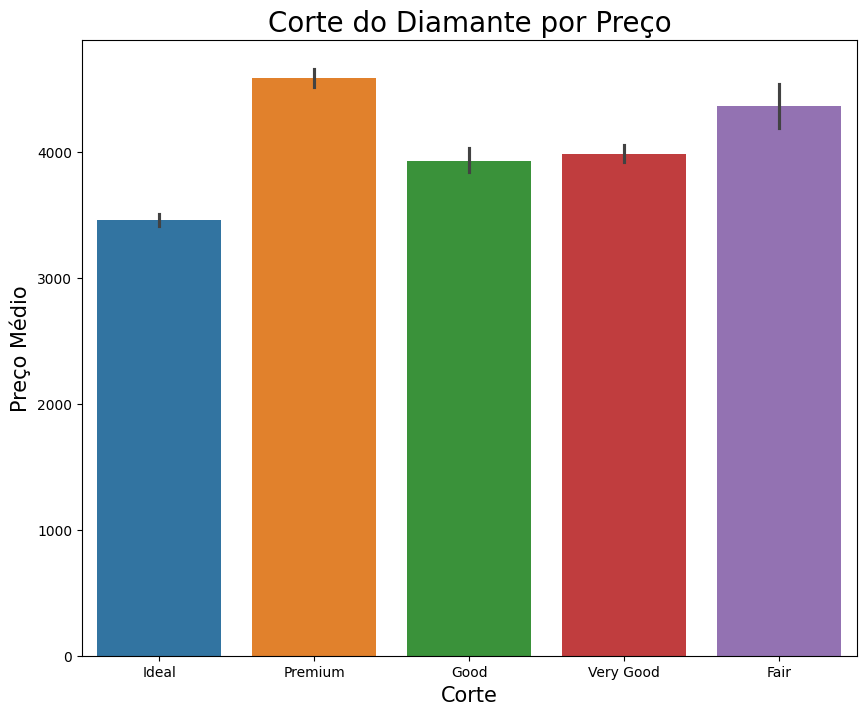

In [11]:
# Criação do gráfico de barras
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="cut", y="price", data=df, hue='cut')

# Personalização do título e rótulos
ax.set_title("Corte do Diamante por Preço", fontsize=20)
ax.set_ylabel("Preço Médio", fontsize=15)
ax.set_xlabel("Corte", fontsize=15)

plt.show()

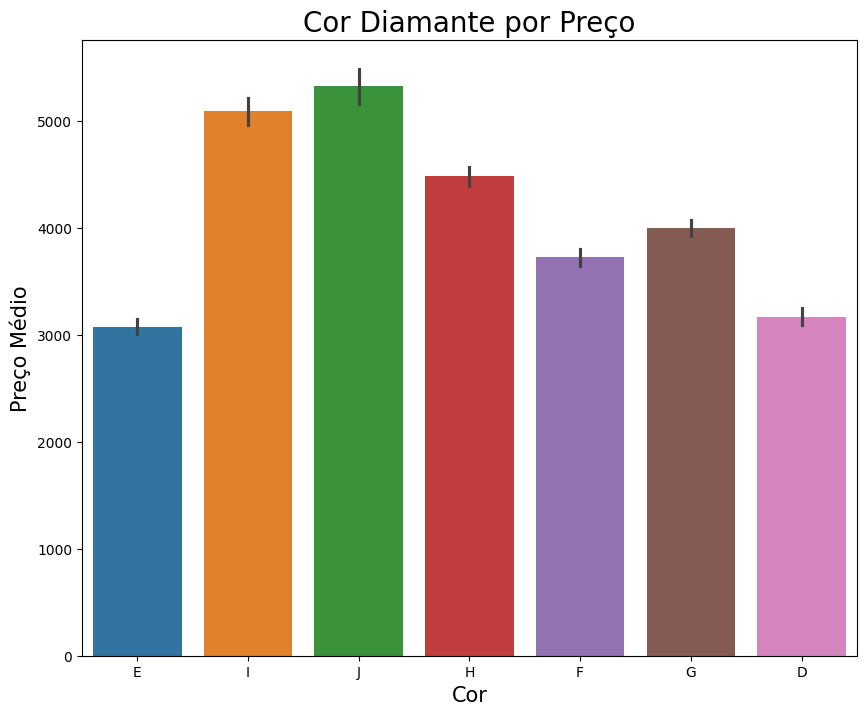

In [12]:
# Criação do gráfico de barras
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="color", y="price", data=df, hue='color')

# Personalização do título e rótulos
ax.set_title("Cor Diamante por Preço", fontsize=20)
ax.set_ylabel("Preço Médio", fontsize=15)
ax.set_xlabel("Cor", fontsize=15)


plt.show()

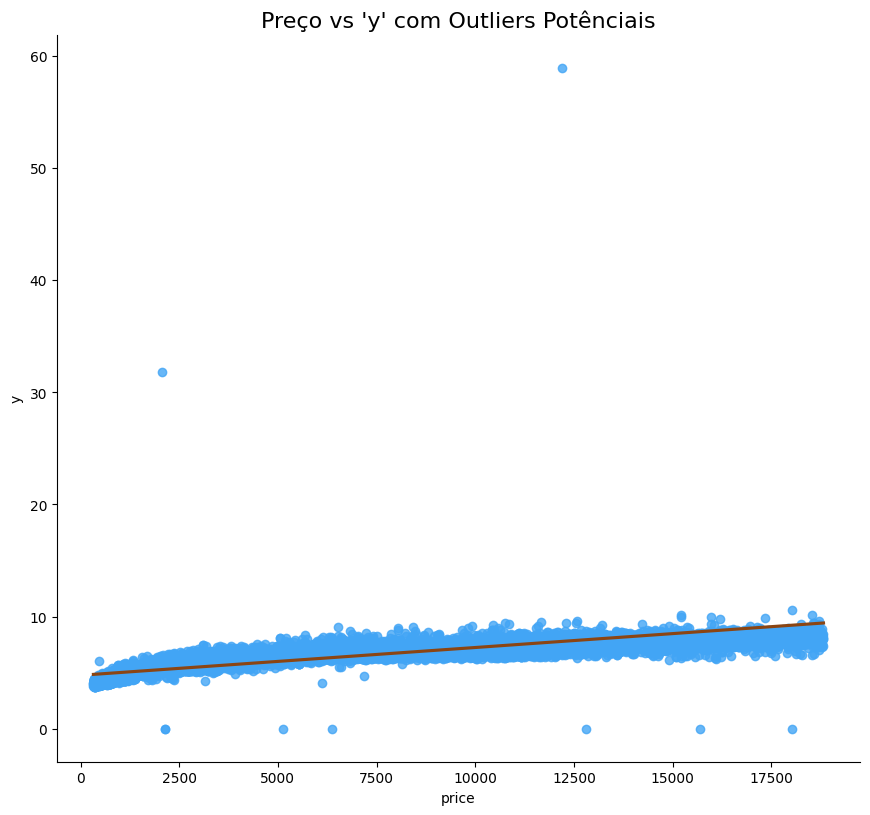

In [13]:
# Gráfico simples de regressão com foco em outliers
sns.lmplot(x="price", y="y", data=df, scatter_kws={"color": "#42a5f5"}, line_kws={"color": "#8B4513"}, height=8, aspect=1.1)

# Adicionando título
plt.title("Preço vs 'y' com Outliers Potênciais", fontsize=16)

# Mostrando o gráfico
plt.show()

<Figure size 1200x800 with 0 Axes>

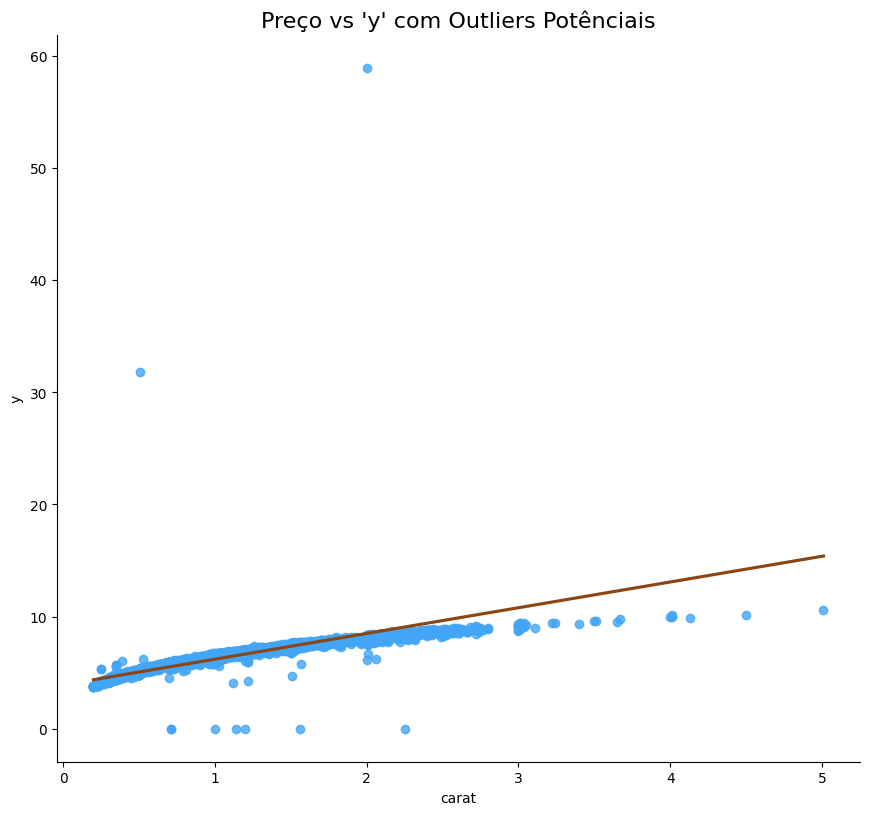

In [14]:
# Gráfico simples de regressão com foco em outliers

plt.figure(figsize=(12,8))
sns.lmplot(x="carat", y="y", data=df, scatter_kws={"color": "#42a5f5"}, line_kws={"color": "#8B4513"}, height=8, aspect=1.1)

# Adicionando título
plt.title("Preço vs 'y' com Outliers Potênciais", fontsize=16)

# Mostrando o gráfico
plt.show()

In [15]:
# Removendo a coluna "Unnamed"
data_df = df.drop(["Unnamed: 0"], axis=1)

In [16]:
# Fazendo uma copia do df oroginal
data1 = data_df.copy()

# Aplicando label encoder para as colunas categorias
colunas = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in colunas:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


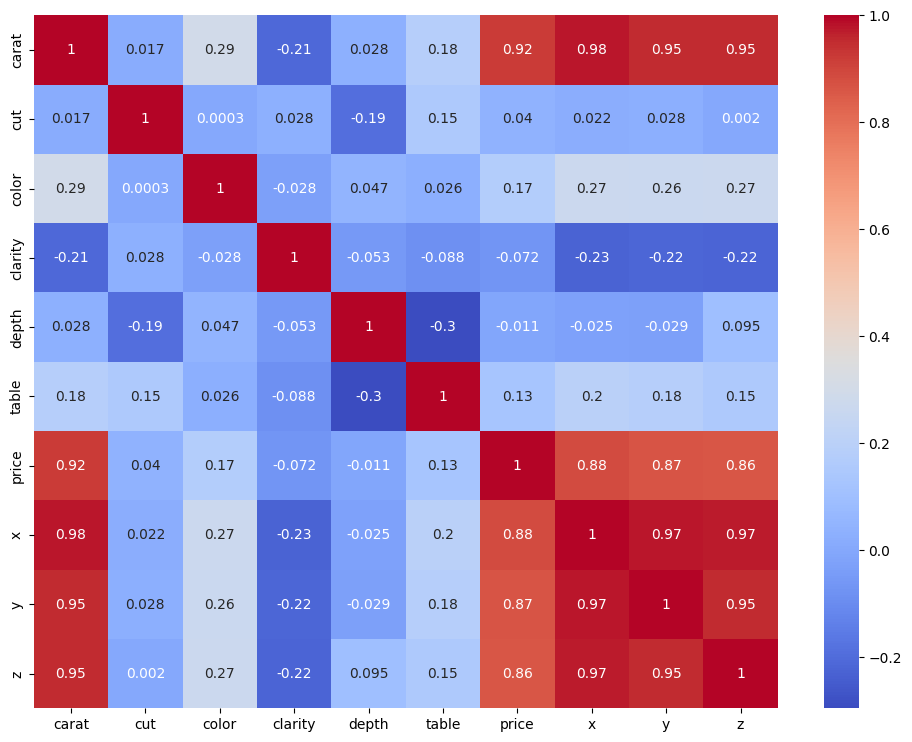

In [17]:
# examinando a matrix de correlação usando heatmap

# Calcula a matriz de correlação
corrmat = data1.corr()

# Cria a figura com tamanho ajustado
plt.figure(figsize=(12, 9))

# Plota o heatmap
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

# Exibe o gráfico
plt.show()

In [18]:
from scipy.stats import chi2_contingency

def calculate_chi2(df, target_column):
    """Calculates chi-squared test for categorical features against a target column."""
    results = {}

    for col in df.columns:
        if col != target_column:  
            contingency_table = pd.crosstab(df[col], df[target_column])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results[col] = {'chi2': chi2, 'p-value': p}
    return results


chi2_results = calculate_chi2(data1, 'price')


for col, values in chi2_results.items():
  print(f"Chi-squared test for '{col}' vs 'price':")
  print(f"  Chi2 statistic: {values['chi2']}")
  print(f"  P-value: {values['p-value']}")
  print("-" * 20)

Chi-squared test for 'carat' vs 'price':
  Chi2 statistic: 8368938.99754757
  P-value: 0.0
--------------------
Chi-squared test for 'cut' vs 'price':
  Chi2 statistic: 58970.25277540097
  P-value: 1.16375276e-316
--------------------
Chi-squared test for 'color' vs 'price':
  Chi2 statistic: 111326.28294795017
  P-value: 0.0
--------------------
Chi-squared test for 'clarity' vs 'price':
  Chi2 statistic: 127923.174260438
  P-value: 0.0
--------------------
Chi-squared test for 'depth' vs 'price':
  Chi2 statistic: 2092629.5176975345
  P-value: 1.0
--------------------
Chi-squared test for 'table' vs 'price':
  Chi2 statistic: 1458379.4928022958
  P-value: 0.9749051869658266
--------------------
Chi-squared test for 'x' vs 'price':
  Chi2 statistic: 11143992.807387773
  P-value: 0.0
--------------------
Chi-squared test for 'y' vs 'price':
  Chi2 statistic: 10997185.071596218
  P-value: 0.0
--------------------
Chi-squared test for 'z' vs 'price':
  Chi2 statistic: 7797366.276291687
 

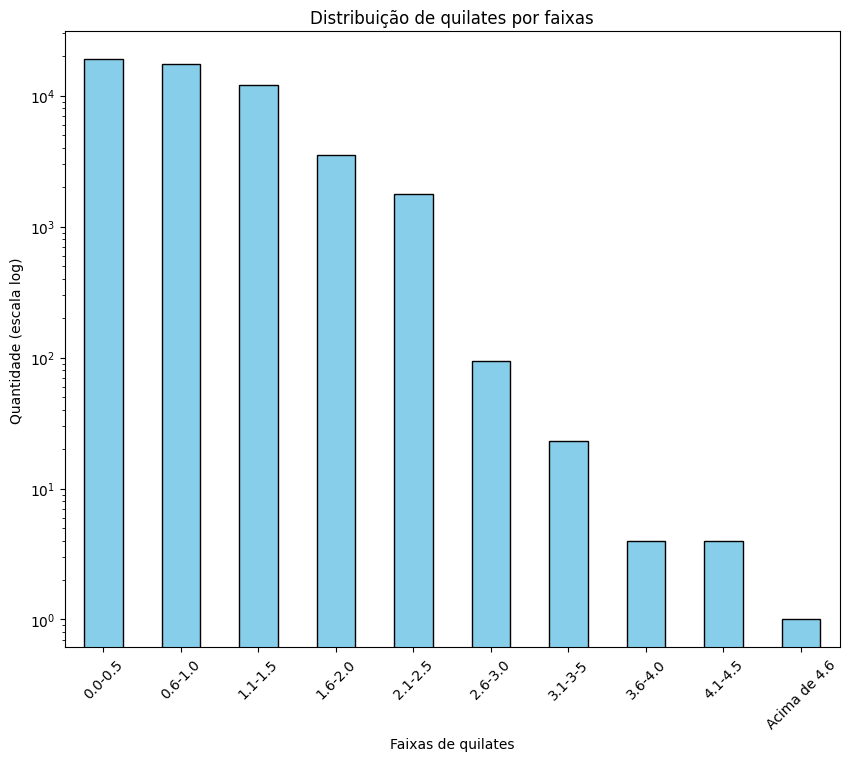

In [19]:
# Definir os bins e labels
bins = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 6.0]  # Adjust these ranges as needed
labels = ['0.0-0.5', '0.6-1.0', '1.1-1.5', '1.6-2.0', '2.1-2.5', '2.6-3.0', '3.1-3-5', '3.6-4.0', '4.1-4.5', 'Acima de 4.6']

# Categoriza os quilates nos bis definidos
df['carat range'] = pd.cut(df['carat'], bins=bins, labels=labels)


# Conta a ocorrência de quilates em cada faixa e plota
plt.figure(figsize=(10,8))

carat_counts = df['carat range'].value_counts().sort_index()
carat_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribuição de quilates por faixas')
plt.yscale('log')
plt.xlabel('Faixas de quilates')
plt.ylabel('Quantidade (escala log)')
plt.xticks(rotation=45)
plt.show()

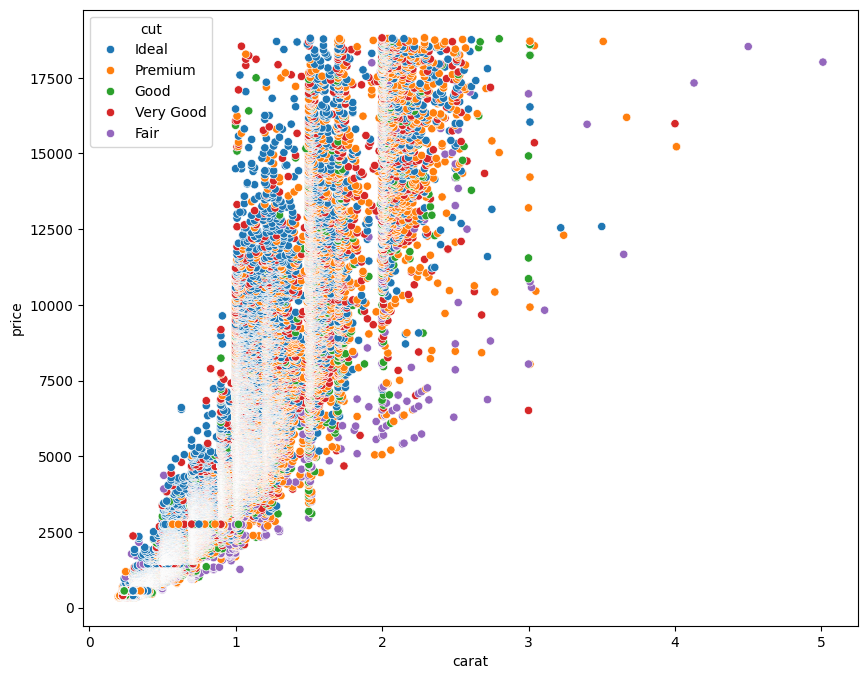

In [20]:
# Distribuição de preços por quilate, com corte como hue

plt.figure(figsize=(10,8))
sns.scatterplot(df, x='carat', y='price', hue='cut')
plt.show()

### Análises João 02/12

In [166]:
diamonds = df.copy()

In [167]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat range
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0-0.5
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0-0.5
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0-0.5
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0-0.5
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0-0.5


In [168]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   53940 non-null  int64   
 1   carat        53940 non-null  float64 
 2   cut          53940 non-null  object  
 3   color        53940 non-null  object  
 4   clarity      53940 non-null  object  
 5   depth        53940 non-null  float64 
 6   table        53940 non-null  float64 
 7   price        53940 non-null  int64   
 8   x            53940 non-null  float64 
 9   y            53940 non-null  float64 
 10  z            53940 non-null  float64 
 11  carat range  53940 non-null  category
dtypes: category(1), float64(6), int64(2), object(3)
memory usage: 4.6+ MB


### Verificando os nulos e NaNs

In [169]:
diamonds.isnull().value_counts()

Unnamed: 0  carat  cut    color  clarity  depth  table  price  x      y      z      carat range
False       False  False  False  False    False  False  False  False  False  False  False          53940
Name: count, dtype: int64

In [170]:
diamonds.isna().value_counts()

Unnamed: 0  carat  cut    color  clarity  depth  table  price  x      y      z      carat range
False       False  False  False  False    False  False  False  False  False  False  False          53940
Name: count, dtype: int64

### Exluindo a coluna "Unnmamed: 0" por ser uma coluna index

In [171]:
diamonds = diamonds.drop('Unnamed: 0', axis=1)

In [172]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat range
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0-0.5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0-0.5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0-0.5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0-0.5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0-0.5


### Analisando as features "ordinais" - categricas com hierarquia/sequencia

| Feature | Categoria | Descrição |
|---|---|---|
| **cut** | Ideal | O corte mais desejável, maximizando o brilho do diamante. |
| | Premium | Alta qualidade de corte, mas um pouco abaixo do Ideal. |
| | Very Good | Boa qualidade de corte. |
| | Good | Qualidade de corte aceitável, mas com algumas imperfeições visíveis. |
| | Fair | A pior qualidade de corte, com muitas imperfeições visíveis. |
| **color** | D | Incolor, a cor mais desejável e rara. |
| | E | Quase incolor, muito próximo do D. |
| | F | Levemente amarelado, ainda considerado incolor. |
| | G | Ligeiramente amarelado, mas menos desejável que F. |
| | H | Amarelado, menos desejável que G. |
| | I | Distintamente amarelado. |
| | J | Amarelado, a cor menos desejável. |
| **clarity** | IF (Internally Flawless) | Sem inclusões visíveis sob 10x de ampliação. |
| | VVS1 e VVS2 (Very Very Slightly Included) | Inclusões muito, muito pequenas e difíceis de serem vistas por um observador experiente. |
| | VS1 e VS2 (Very Slightly Included) | Inclusões menores, difíceis de serem vistas por um observador experiente. |
| | SI1 e SI2 (Slightly Included) | Inclusões menores, visíveis sob 10x de ampliação. |
| | I1 (Included) | Inclusões óbvias, visíveis a olho nu. |
| **carat** | 0.0-0.5 | Diamantes de peso muito pequeno. |
| | 0.6-1.0 | Diamantes de peso pequeno. |
| | 1.1-1.5 | Diamantes de peso médio. |
| | 1.6-2.0 | Diamantes de peso médio a grande. |
| | 2.1-2.5 | Diamantes grandes. |
| | 2.6-3.0 | Diamantes muito grandes. |
| | 3.1-3.5 | Diamantes excepcionais, muito grandes. |
| | 3.6-4.0 | Diamantes extremamente grandes e raros. |
| | 4.1-4.5 | Diamantes excepcionalmente grandes e raríssimos. |
| | >4.6 | Diamantes gigantescos, extremamente raros. |



In [173]:
diamonds.cut.value_counts(), diamonds.color.value_counts(), diamonds.clarity.value_counts()

(cut
 Ideal        21551
 Premium      13791
 Very Good    12082
 Good          4906
 Fair          1610
 Name: count, dtype: int64,
 color
 G    11292
 E     9797
 F     9542
 H     8304
 D     6775
 I     5422
 J     2808
 Name: count, dtype: int64,
 clarity
 SI1     13065
 VS2     12258
 SI2      9194
 VS1      8171
 VVS2     5066
 VVS1     3655
 IF       1790
 I1        741
 Name: count, dtype: int64)

In [174]:
diamonds['carat range'].value_counts()

carat range
0.0-0.5         18932
0.6-1.0         17506
1.1-1.5         12060
1.6-2.0          3553
2.1-2.5          1763
2.6-3.0            94
3.1-3-5            23
3.6-4.0             4
4.1-4.5             4
Acima de 4.6        1
Name: count, dtype: int64

### Acredito que o gráfico abaixo revela os outliers que estão principalmente nos grupos D, G, H, I e J, com os claridades IF e I1. 

<Axes: xlabel='cut,color'>

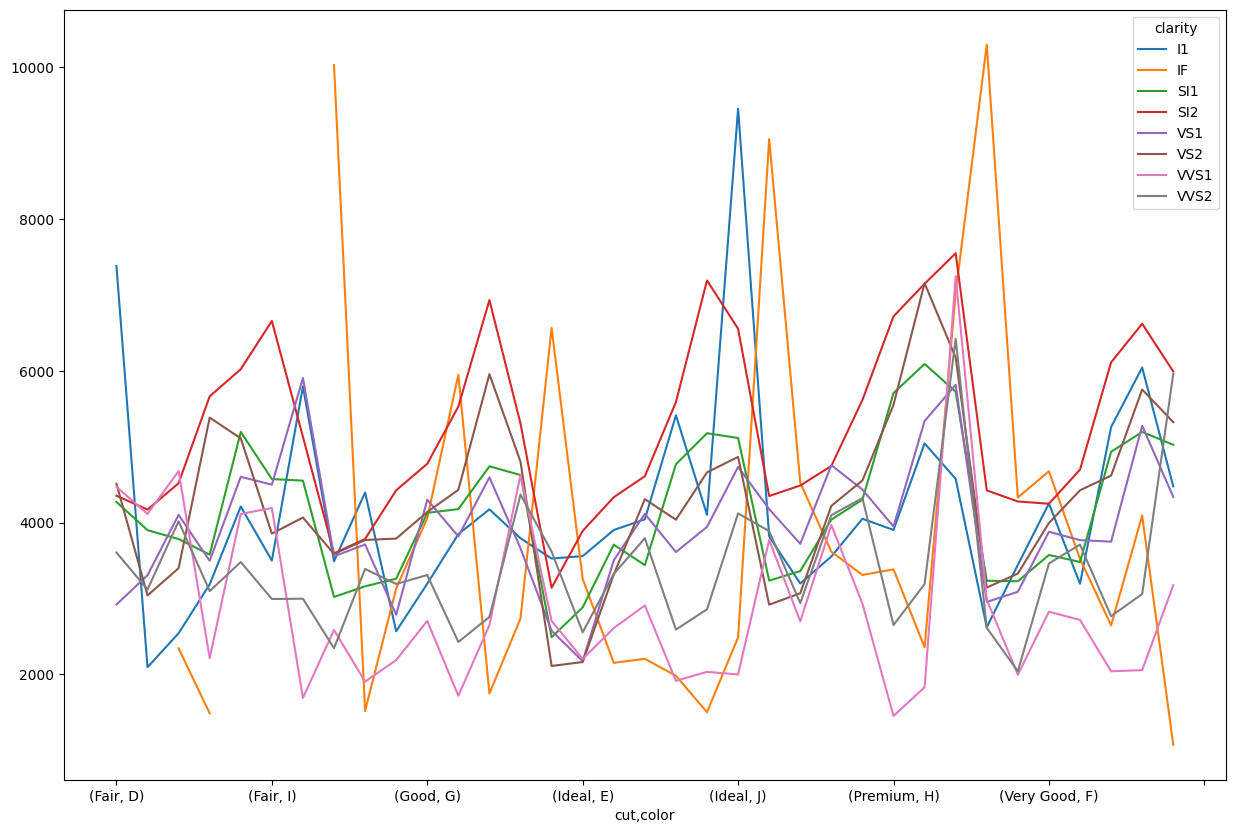

In [176]:
diamonds.groupby(['cut', 'color', 'clarity'])['price'].mean().unstack().plot(figsize=(15, 10))

### Prerpocessamento do dataset para facilitar as análises

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [75]:
# Defiição das hierarquias das categorias
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
carat_order = ['0.0-0.5', '0.6-1.0', '1.1-1.5', '1.6-2.0', '2.1-2.5', '2.6-3.0', '3.1-3-5', '3.6-4.0', '4.1-4.5', 'Acima de 4.6']

# ColumnTransformer com OrdinalEncoder e MinMaxScaler
preprocessor = ColumnTransformer(
    transformers=[
        # OrdinalEncoder nas colunas categóricas com hierarquia
        ('cut', OrdinalEncoder(categories=[cut_order]), ['cut']),
        ('color', OrdinalEncoder(categories=[color_order]), ['color']),
        ('clarity', OrdinalEncoder(categories=[clarity_order]), ['clarity']),
        ('carat range', OrdinalEncoder(categories=[carat_order]), ['carat range']),
        
        # MinMaxScaler nas colunas numéricas
        ('scaler', MinMaxScaler(), ['depth', 'table', 'price', 'x', 'y', 'z'])
    ]
)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Transformar o dataset
diamonds_processed = pipeline.fit_transform(diamonds)

# Resultado volta como um DataFrame para facilitar a visualização
diamonds_processed_df = pd.DataFrame(diamonds_processed, columns=[
    'cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'
])

# Resultado do processamento
print(diamonds_processed_df.head())

   cut  color  clarity  carat     depth     table     price         x  \
0  4.0    5.0      1.0    0.0  0.513889  0.230769  0.000000  0.367784   
1  3.0    5.0      2.0    0.0  0.466667  0.346154  0.000000  0.362197   
2  1.0    5.0      4.0    0.0  0.386111  0.423077  0.000054  0.377095   
3  3.0    1.0      3.0    0.0  0.538889  0.288462  0.000433  0.391061   
4  1.0    0.0      1.0    0.0  0.563889  0.288462  0.000487  0.404097   

          y         z  
0  0.067572  0.076415  
1  0.065195  0.072642  
2  0.069100  0.072642  
3  0.071817  0.082704  
4  0.073854  0.086478  


### Analises após o preprocessamento

In [ ]:
# Calcular a correlação
correlation = diamonds_processed_df.corr()

# Exibir a correlação entre a variável alvo
print(correlation['price'])

cut       -0.053491
color     -0.172511
clarity   -0.146800
carat      0.889415
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64


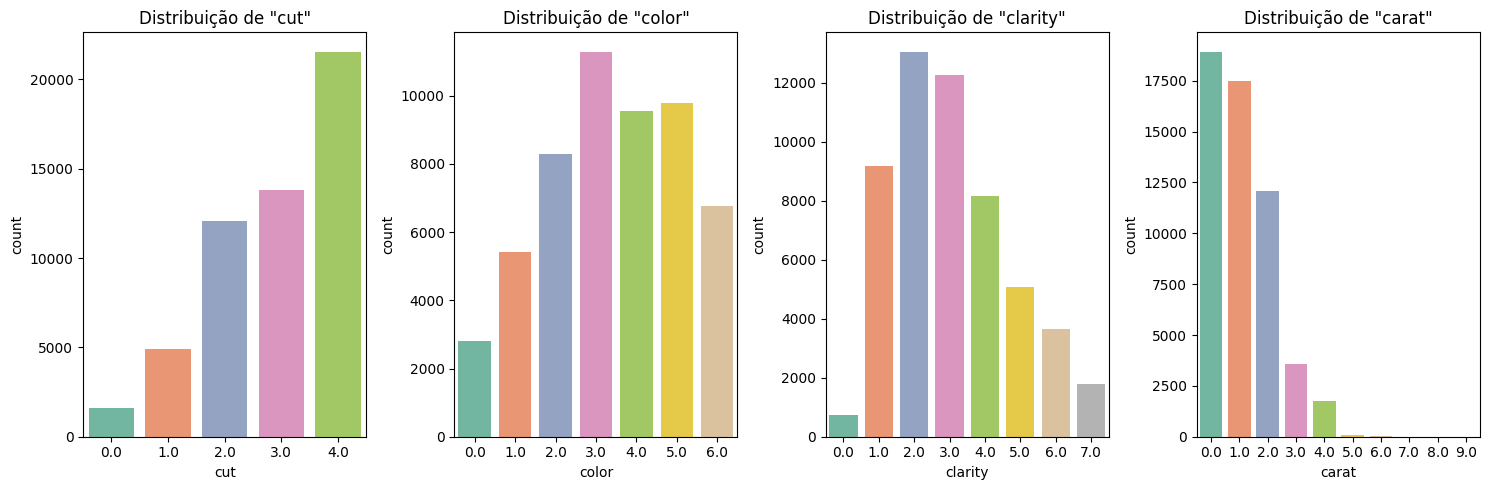

In [64]:
# Configurar a figura
plt.figure(figsize=(15, 5))

# Gráfico 1: Histograma para a feature 'cut'
plt.subplot(1, 4, 1)
sns.countplot(x='cut', data=diamonds_processed_df, palette='Set2')
plt.title('Distribuição de "cut"')

# Gráfico 2: Histograma para a feature 'color'
plt.subplot(1, 4, 2)
sns.countplot(x='color', data=diamonds_processed_df, palette='Set2')
plt.title('Distribuição de "color"')

# Gráfico 3: Histograma para a feature 'clarity'
plt.subplot(1, 4, 3)
sns.countplot(x='clarity', data=diamonds_processed_df, palette='Set2')
plt.title('Distribuição de "clarity"')

# Gráfico 4: Histograma para a feature 'carat range'
plt.subplot(1, 4, 4)
sns.countplot(x='carat', data=diamonds_processed_df, palette='Set2')
plt.title('Distribuição de "carat"')


# Exibir os gráficos
plt.tight_layout()
plt.show()

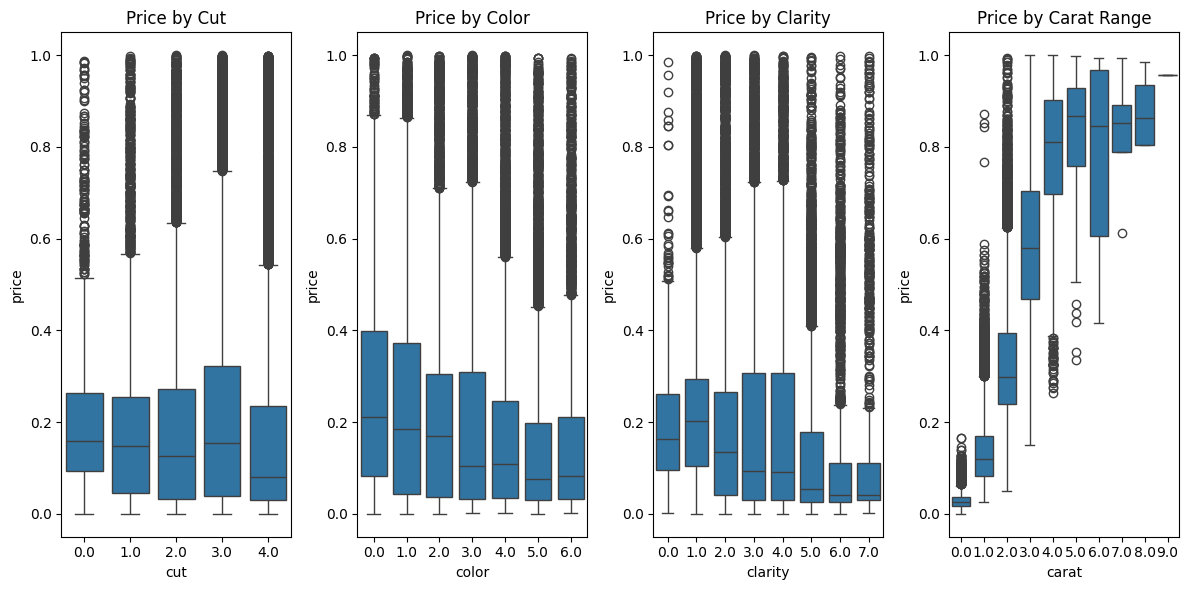

In [65]:
# Criando o boxplot para as variáveis "cut", "color" e "clarity" com a variável "price"
plt.figure(figsize=(12, 6))

# Boxplot para "cut"
plt.subplot(1, 4, 1)
sns.boxplot(x='cut', y='price', data=diamonds_processed_df)
plt.title('Price by Cut')

# Boxplot para "color"
plt.subplot(1, 4, 2)
sns.boxplot(x='color', y='price', data=diamonds_processed_df)
plt.title('Price by Color')

# Boxplot para "clarity"
plt.subplot(1, 4, 3)
sns.boxplot(x='clarity', y='price', data=diamonds_processed_df)
plt.title('Price by Clarity')

# Boxplot para "clarity"
plt.subplot(1, 4, 4)
sns.boxplot(x='carat', y='price', data=diamonds_processed_df)
plt.title('Price by Carat Range')

plt.tight_layout()
plt.show()

### Analisando os autliers

1. IQR (Intervalo Interquartil):

Calcule o primeiro quartil (Q1) e o terceiro quartil (Q3).

Determine o IQR (Q3 - Q1).

Qualquer valor abaixo de Q1 - 1.5IQR ou acima de Q3 + 1.5IQR é considerado um outlier.

2. Z-score:

Calcule a média e o desvio padrão da variável.

Calcule o z-score para cada observação: (valor - média) / desvio padrão.

Valores com z-score acima de 3 ou abaixo de -3 são frequentemente considerados outliers.

In [79]:
# Calculando IQR e Z-score para a coluna 'price'
Q1 = diamonds_processed_df['price'].quantile(0.25)
Q3 = diamonds_processed_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Outliers usando IQR
outliers_iqr = (diamonds_processed_df['price'] < (Q1 - 1.5*IQR)) | (diamonds_processed_df['price'] > (Q3 + 1.5*IQR))

# Outliers usando Z-score
z_scores = np.abs((diamonds_processed_df['price'] - diamonds_processed_df['price'].mean()) / diamonds_processed_df['price'].std())
outliers_zscore = z_scores > 3

# Contando o número de outliers
print("Número de outliers (IQR):", outliers_iqr.sum())
print("Número de outliers (Z-score):", outliers_zscore.sum())

Número de outliers (IQR): 3540
Número de outliers (Z-score): 1206


In [83]:
print("Percentual de outliers em relação ao dataset (IQR):",
      outliers_iqr.sum()/ diamonds_processed_df.shape[0]*100)

Percentual de outliers em relação ao dataset (IQR): 6.562847608453838


### O que fazer com os outlier???? Decisão em grupo? Apresentar opções

### Splitting o dataset para clusterização - primeiras observações

In [131]:
X = diamonds_processed_df.drop('price', axis=1)
y = diamonds_processed_df.price

In [132]:
X.head()

,cut,color,clarity,carat,depth,table,x,y,z
0,4.0,5.0,1.0,0.0,0.513889,0.230769,0.367784,0.067572,0.076415
1,3.0,5.0,2.0,0.0,0.466667,0.346154,0.362197,0.065195,0.072642
2,1.0,5.0,4.0,0.0,0.386111,0.423077,0.377095,0.069100,0.072642
3,3.0,1.0,3.0,0.0,0.538889,0.288462,0.391061,0.071817,0.082704
4,1.0,0.0,1.0,0.0,0.563889,0.288462,0.404097,0.073854,0.086478


In [118]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Preparando o algoritmo de Clusterização utilizando o preprocessamento já realizado

In [134]:
from sklearn.cluster import KMeans

In [135]:
# considerando Kmeans como o numero de 
kmeans = KMeans(n_clusters = 4)

In [136]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [140]:
kmeans.predict(X)

array([2, 2, 2, ..., 2, 3, 2], dtype=int32)

In [141]:
kmeans.labels_

array([2, 2, 2, ..., 2, 3, 2], dtype=int32)

In [142]:
labels_clusters = kmeans.labels_
len(labels_clusters)

53940

In [151]:
diamonds_processed_df_X = pd.DataFrame(X, columns="cut color clarity carat depth table".split())
labels_series = pd.Series(labels_clusters, name = "label")

In [152]:
diamonds_processed_df_result = pd.concat([diamonds_processed_df_X, labels_series], axis = 1)

In [153]:
diamonds_processed_df_result.head()

,cut,color,clarity,carat,depth,table,label
0,4.0,5.0,1.0,0.0,0.513889,0.230769,2
1,3.0,5.0,2.0,0.0,0.466667,0.346154,2
2,1.0,5.0,4.0,0.0,0.386111,0.423077,2
3,3.0,1.0,3.0,0.0,0.538889,0.288462,0
4,1.0,0.0,1.0,0.0,0.563889,0.288462,0


<Axes: xlabel='depth', ylabel='table'>

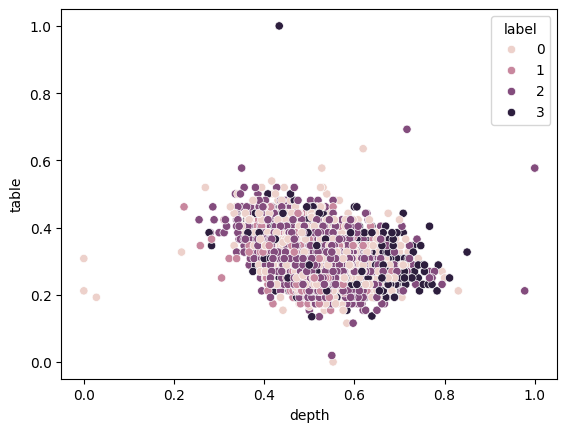

In [158]:
sns.scatterplot(data = diamonds_processed_df_result, x = "depth", y = "table", hue = "label")

### Considerando as features estudadas "cut	color clarity carat	depth table x y	z", foi previamente definida 4 grupos que se podem estar relacionados com o "cut". O que faz sentido pelo preço mais caro relacionado à qualidade do corte. 
### Para o gráfico acima, as features depth e table representaram 4 quatro grupos e não cinco, como conhecido no dataset. 

### Até o presente momento de análise para Clusterização, DBScan ou HDBScan poderão ser opções mais indicadas
